In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.loc[df['Insulin']==0,'Insulin']=np.nan
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,0,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,NaN,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,NaN,30.1,0.349,47,1


In [ ]:
df=df.fillna(df['Insulin'].mean())
df['Insulin']=df['Insulin'].astype(int)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.6,0.627,50,1
1,1,85,66,29,155,26.6,0.351,31,0
2,8,183,64,0,155,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,155,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,155,30.1,0.349,47,1


In [ ]:
cor=df.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,0.055478,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.407843,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.045584,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.088926,0.392573,0.183928,-0.113970,0.074752
Insulin,0.055478,0.407843,0.045584,0.088926,1.000000,0.149885,0.099170,0.136050,0.214278
BMI,0.017683,0.221071,0.281805,0.392573,0.149885,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.099170,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,0.136050,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.214278,0.292695,0.173844,0.238356,1.000000


In [ ]:
x=df[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction','Age']].values
x

array([[  6.   , 148.   ,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  30.4  ,   0.315,  23.   ]])

In [ ]:
y=df['Outcome'].values

In [ ]:
train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.2)

In [ ]:
sc=StandardScaler()

In [ ]:
train_x=sc.fit_transform(train_x)
test_x=sc.fit_transform(test_x)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clr=LogisticRegression()
clr.fit(train_x,train_y)

LogisticRegression()

In [ ]:
py_clr=clr.predict(test_x)
py_clr

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
aclr=accuracy_score(test_y,py_clr)*100
aclr

80.51948051948052

In [ ]:
confusion_matrix(test_y,py_clr)

array([[96, 10],
       [20, 28]])

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200)
rfc.fit(train_x,train_y)

RandomForestClassifier(n_estimators=200)

In [ ]:
py_rfc=rfc.predict(test_x)
py_rfc

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
acrf=accuracy_score(test_y,py_rfc)*100
acrf

77.27272727272727

In [ ]:
confusion_matrix(test_y,py_rfc)

array([[92, 14],
       [21, 27]])

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

In [ ]:
py_dtc=dtc.predict(test_x)
py_dtc

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
acdt=accuracy_score(test_y,py_rfc)*100
acdt

77.27272727272727

In [ ]:
confusion_matrix(test_y,py_rfc)

array([[92, 14],
       [21, 27]])

### XGBoost

In [ ]:
from xgboost import XGBClassifier
xgbc= XGBClassifier(gamma=0)
xgbc.fit(train_x,train_y)

XGBClassifier()

In [ ]:
py_xgbc=xgbc.predict(test_x)
py_xgbc

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
acxg=accuracy_score(test_y,py_xgbc)*100
acxg

73.37662337662337

In [ ]:
confusion_matrix(test_y,py_xgbc)

array([[83, 23],
       [18, 30]])

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svcc= SVC()
svcc.fit(train_x,train_y)

SVC()

In [ ]:
py_svcc=svcc.predict(test_x)
py_svcc

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
acsvm=accuracy_score(test_y,py_svcc)*100
acsvm

83.11688311688312

In [ ]:
confusion_matrix(test_y,py_svcc)

array([[96, 10],
       [16, 32]])

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

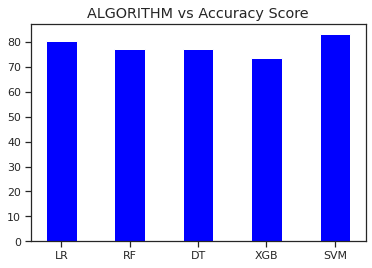

In [ ]:
MODELS=['LR','RF','DT','XGB','SVM']
GRAPH=[aclr,acrf,acdt,acxg,acsvm]
plt.bar(MODELS,GRAPH,color='blue',width=0.45,align='center', data=None)
plt.style.use('ggplot')
plt.title('ALGORITHM vs Accuracy Score')
plt.show()



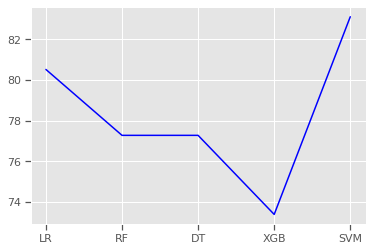

In [ ]:
plt.plot(MODELS,GRAPH,color='blue')

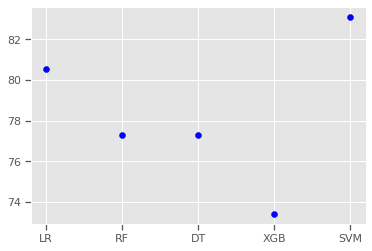

In [ ]:
plt.scatter(MODELS,GRAPH,color='blue')

### Conclusion

*Therefore* SVM is the best model for this prediction since it has an accuracy_score of 83.11%

